# CountVectorizer

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
lines = [
 'Four score and 7 years ago our fathers brought forth,',
 '... a new NATION, conceived in liberty $$$,',
 'and dedicated to the PrOpOsItIoN that all men are created equal',
 'One nation\'s freedom equals #freedom for another $nation!'
]

In [3]:
# Vectorize the lines
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(lines)
# Show the resulting word matrix
feature_names = vectorizer.get_feature_names_out()
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,
 columns=feature_names)
df.head()


,ago,brought,conceived,created,dedicated,equal,equals,fathers,forth,freedom,liberty,men,nation,new,proposition,score,years
Line 1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
Line 2,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
Line 3,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
Line 4,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0


Observe from the output that equal and equals count as separate words, even
though they have similar meaning. Data scientists sometimes go a step further when preparing text for machine learning by stemming or lemmatizing words. If the preceding text were stemmed, all occurrences of equals would be converted to equal.

 stemming  

lemmatizing

NLTK

In [4]:
import re

def preprocess_text(text):
    return re.sub(r'\d+', '', text).lower()

vectorizer = CountVectorizer(stop_words='english', preprocessor=preprocess_text)
word_matrix = vectorizer.fit_transform(lines)


# Sentiment Analysis

In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Applied ML/reviews.csv', encoding='ISO-8859-1')
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [8]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

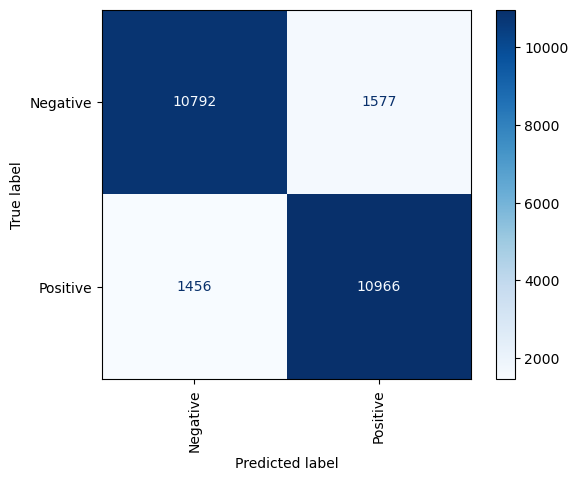

In [12]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Positive'],cmap='Blues', xticks_rotation='vertical')

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

In [14]:
# Make predictions on the test data
y_pred = model.predict(x_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)


Accuracy: 0.88
Precision: 0.87
Recall: 0.88
F1 Score: 0.88

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12369
    Positive       0.87      0.88      0.88     12422

    accuracy                           0.88     24791
   macro avg       0.88      0.88      0.88     24791
weighted avg       0.88      0.88      0.88     24791



In [16]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.0914729373314221

In [17]:
text = 'The food was great and the service was excellent!'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8579338868374013

In [18]:
text = 'f this awful scenes'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.11715582836388011

In [19]:
text = 'i feel like it the best movie i have ever seen'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8421839244180919

# Spam Filtering

In [20]:
import pandas as pd
df = pd.read_csv('ham-spam.csv')
df.head()


,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [21]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [22]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()


Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

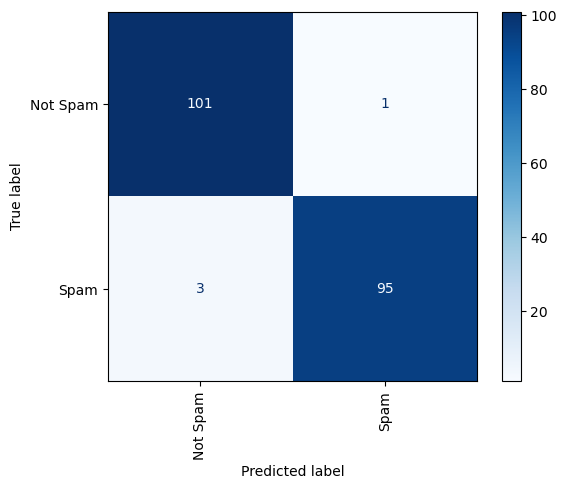

In [27]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test, display_labels=['Not Spam', 'Spam'], cmap='Blues', xticks_rotation='vertical')

In [29]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
# Make predictions on the test data
y_pred = model.predict(x_test)


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)


Accuracy: 0.98
Precision: 0.99
Recall: 0.97
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       102
    Positive       0.99      0.97      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [31]:
model.score(x_test, y_test)


0.98

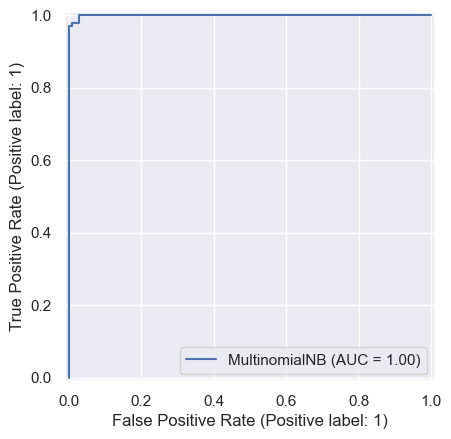

In [33]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()
rcd.from_estimator(model, x_test, y_test)


In [34]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]


0

In [35]:
model.predict_proba(input)[0][0]

0.9999497111473539

In [36]:
msg = 'Why pay more for expensive meds when you can order them online ' \
 'and save $$$?'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [39]:
model.predict_proba(input)[0][0]

0.00021423891260677753

In [40]:
model.predict_proba(input)[0][1]

0.9997857610873945

In [ ]:
C:\Users\IDEH\Desktop\Sentimental\Data

# Building a Movie Recommendation System

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Data/movies.csv')
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [2]:
df = df[['title', 'genres', 'keywords', 'cast', 'director']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   genres    4775 non-null   object
 2   keywords  4391 non-null   object
 3   cast      4760 non-null   object
 4   director  4773 non-null   object
dtypes: object(5)
memory usage: 187.7+ KB


In [4]:
df = df.fillna('') # Fill missing values with empty strings
df.head()

,title,genres,keywords,cast,director
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [6]:
df['features'] = df['title'] + ' ' + df['genres'] + ' ' + \
 df['keywords'] + ' ' + df['cast'] + ' ' + \
 df['director']
df

,title,genres,keywords,cast,director,features
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Avatar Action Adventure Fantasy Science Fictio...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,Pirates of the Caribbean: At World's End Adven...
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Spectre Action Adventure Crime spy based on no...
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,The Dark Knight Rises Action Crime Drama Thril...
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,John Carter Action Adventure Science Fiction b...
...,...,...,...,...,...,...
4798,El Mariachi,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,El Mariachi Action Crime Thriller united state...
4799,Newlyweds,Comedy Romance,,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,Newlyweds Comedy Romance Edward Burns Kerry B...
4800,"Signed, Sealed, Delivered",Comedy Drama Romance TV Movie,date love at first sight narration investigati...,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"Signed, Sealed, Delivered Comedy Drama Romance..."
4801,Shanghai Calling,,,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,Shanghai Calling Daniel Henney Eliza Coupe B...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=20)
word_matrix = vectorizer.fit_transform(df['features'])
word_matrix.shape


(4803, 918)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_matrix)


In [9]:
def get_recommendations(title, df, sim, count=10):
    # Get the row index of the specified title in the DataFrame
    index = df.index[df['title'].str.lower() == title.lower()]

    # Return an empty list if there is no entry for the specified title
    if len(index) == 0:
        return []

    # Get the corresponding row in the similarity matrix
    similarities = list(enumerate(sim[index[0]]))

    # Sort the similarity scores in that row in descending order
    recommendations = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Get the top n recommendations, ignoring the first entry in the list since
    # it corresponds to the title itself (and thus has a similarity of 1.0)
    top_recs = recommendations[1:count + 1]

    # Generate a list of titles from the indexes in top_recs
    titles = []
    for i in range(len(top_recs)):
        title = df.iloc[top_recs[i][0]]['title']
        titles.append(title)
    
    return titles


In [10]:
get_recommendations('Skyfall', df, sim)


['Spectre',
 'Quantum of Solace',
 'Johnny English Reborn',
 'Clash of the Titans',
 'Die Another Day',
 'Diamonds Are Forever',
 'Wrath of the Titans',
 'I Spy',
 'Sanctum',
 'Blackthorn']

In [11]:
get_recommendations('Mulan', df, sim)


['Shrek',
 'Frozen',
 '1911',
 'Kung Fu Panda',
 'Shrek the Third',
 'The Polar Express',
 'Tangled',
 'Shrek Forever After',
 'Shrek 2',
 'Jungle Shuffle']

In [12]:
pd.set_option('display.max_rows', None)
print(df['title'])

0                                                  Avatar
1                Pirates of the Caribbean: At World's End
2                                                 Spectre
3                                   The Dark Knight Rises
4                                             John Carter
5                                            Spider-Man 3
6                                                 Tangled
7                                 Avengers: Age of Ultron
8                  Harry Potter and the Half-Blood Prince
9                      Batman v Superman: Dawn of Justice
10                                       Superman Returns
11                                      Quantum of Solace
12             Pirates of the Caribbean: Dead Man's Chest
13                                        The Lone Ranger
14                                           Man of Steel
15               The Chronicles of Narnia: Prince Caspian
16                                           The Avengers
17            